In [3]:
#importacion de librerías necesarias
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\ManuelDev\AppData\Local\Temp\ipykernel_16692\3019213151.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
dataframe = pd.read_csv("4.2.Compras.csv")
print(dataframe)
#se importa el dataframe y se imprime la información

     Identificador    Sexo  Edad  Salario  Compra
0         15624510  Hombre    19    19000       0
1         15810944  Hombre    35    20000       0
2         15668575   Mujer    26    43000       0
3         15603246   Mujer    27    57000       0
4         15804002  Hombre    19    76000       0
..             ...     ...   ...      ...     ...
395       15691863   Mujer    46    41000       1
396       15706071  Hombre    51    23000       1
397       15654296   Mujer    50    20000       1
398       15755018  Hombre    36    33000       0
399       15594041   Mujer    49    36000       1

[400 rows x 5 columns]


In [5]:
dataframe.describe()
#se revisan los datos  medias cuarquiles y percentiles 

,Identificador,Edad,Salario,Compra
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
#revision de los tipos de datos
dataframe.dtypes

Identificador     int64
Sexo             object
Edad              int64
Salario           int64
Compra            int64
dtype: object

C:\Users\ManuelDev\AppData\Local\Temp\ipykernel_16692\312469773.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x='Sexo', y='Compra', data=dataframe, estimator=np.mean, ci=None)


<Axes: xlabel='Sexo', ylabel='Compra'>

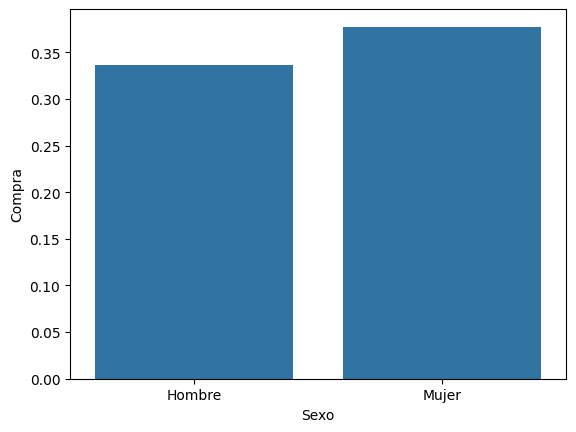

In [13]:
sb.barplot(x='Sexo', y='Compra', data=dataframe, estimator=np.mean, ci=None)

<Axes: xlabel='Edad', ylabel='Compra'>

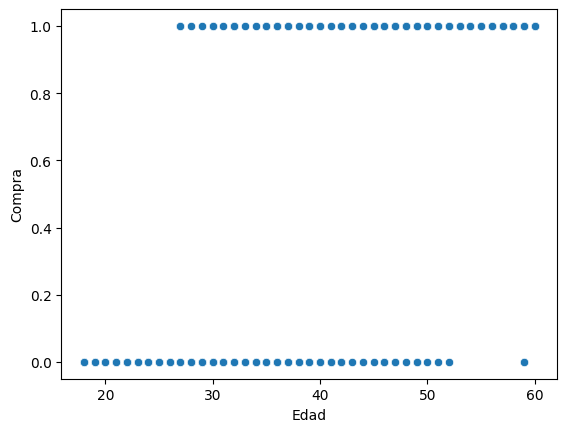

In [17]:
sb.scatterplot(x="Edad",y="Compra", data=dataframe)
#se verifican y analizan los datos 

<Axes: xlabel='Salario', ylabel='Compra'>

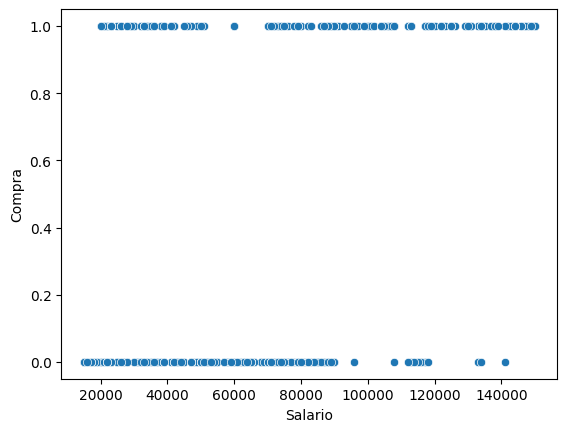

In [18]:
sb.scatterplot(x="Salario",y="Compra", data=dataframe)

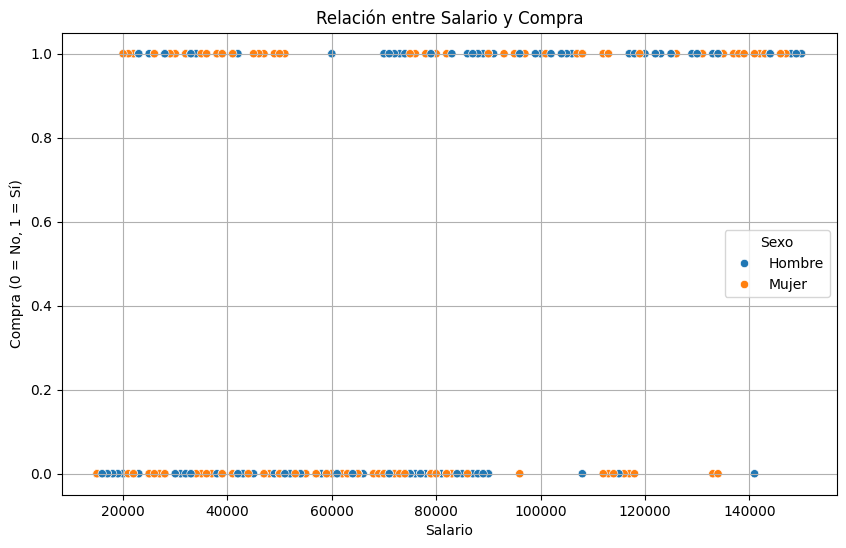

In [24]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Salario', y='Compra', data=dataframe, hue='Sexo')
plt.title('Relación entre Salario y Compra')
plt.xlabel('Salario')
plt.ylabel('Compra (0 = No, 1 = Sí)')
plt.legend(title='Sexo')
plt.grid(True)
plt.show()

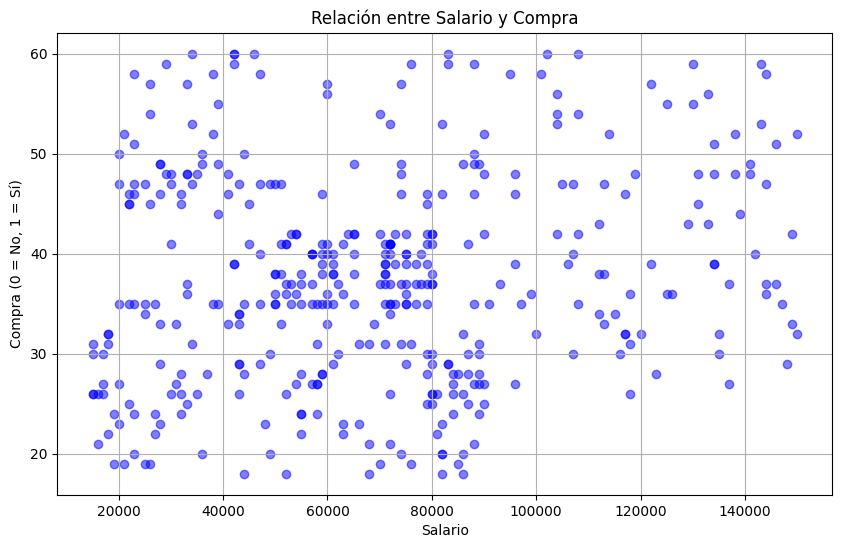

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(dataframe['Salario'], dataframe['Edad'], c='blue', alpha=0.5)
plt.title('Relación entre Salario y Compra')
plt.xlabel('Salario')
plt.ylabel('Compra (0 = No, 1 = Sí)')
plt.grid(True)
plt.show()
#se revisan diferentes variables para saber con que datos se pueden hacer los modelos de regreción lineal

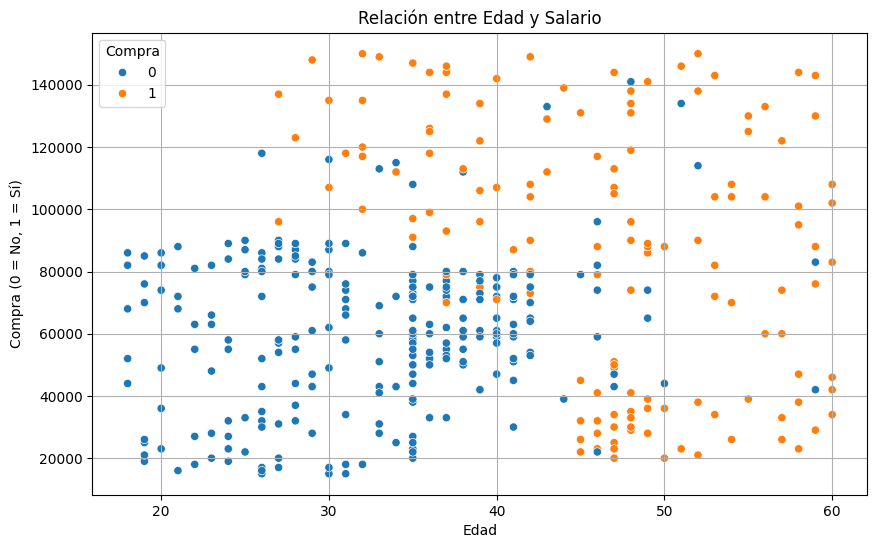

In [32]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Edad', y='Salario', data=dataframe, hue='Compra')
plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Compra (0 = No, 1 = Sí)')
plt.legend(title='Compra')
plt.grid(True)
plt.show()

In [34]:
# ya revisadas y analizadas las variabesl se puede procedes a realizar los modelos
from sklearn.linear_model import LinearRegression
modelo= LinearRegression()